In [268]:
import pandas as pd
import numpy as np

In [269]:
df_categories = pd.read_csv('./df_categories.csv')
df_comments = pd.read_csv('./df_comments.csv')
df_transcript = pd.read_csv('./df_transcript.csv')
df_videos = pd.read_csv('./df_videos.csv')
df_stats = pd.read_csv('./df_channel_stats.csv')

In [270]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        31 non-null     int64 
 1   category  31 non-null     object
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [271]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76145 entries, 0 to 76144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         76145 non-null  object 
 1   kind               76143 non-null  object 
 2   author             76053 non-null  object 
 3   author_channel_id  76143 non-null  object 
 4   text               76143 non-null  object 
 5   like_count         76113 non-null  object 
 6   published_at       76113 non-null  object 
 7   updated_at         76113 non-null  object 
 8   canRate            76113 non-null  object 
 9   viewerRating       76113 non-null  object 
 10  canReply           76083 non-null  object 
 11  totalReplyCount    76083 non-null  float64
 12  isPublic           76083 non-null  object 
 13  video_id           76083 non-null  object 
dtypes: float64(1), object(13)
memory usage: 8.1+ MB


In [272]:
df_transcript['transcript'][2]

'faltan mujeres referentes O sea que no\nes\ntanto que no existan sino que quizás no\nse les da la visibilidad Quiénes son las\nemprendedoras españolas que más te\ninspiran hay ti pazas hay ti pazas o sea\nte puedo poner por ejemplo el caso de\nVerónica Pascual Verónica Pascual es una\ntía que quiso llevar desde Burgos la la\nrobotización de almacenes a todo el\nmundo y lo consiguió tío pero es una tía\nque ha llegado a lo más alto es una tía\nque está en el consejo de telefónica que\nestá O sea que que está en los sitios\nmás top eh Y es una tía que lo ha\nconseguido desde Burgos siendo una tía\nnormal y demás si yo de pequeña hubiese\nconocido la historia de Verónica eh o lo\no las estuviese siguiendo como muchos A\nlo mejor eh chavales o sigen a vosotros\nSeguramente me hubiese atrevido a pensar\nque también yo o sea yo durante mucho\ntiempo he ido haciendo sin pensar que yo\niba a ser empresaria sí'

In [273]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   videoId         1291 non-null   object
 1   title           1291 non-null   object
 2   description     368 non-null    object
 3   publishedAt     1291 non-null   object
 4   thumbnail_url   1291 non-null   object
 5   tags            1291 non-null   object
 6   live_broadcast  1291 non-null   object
 7   categoryId      1291 non-null   int64 
 8   viewCount       1291 non-null   int64 
 9   likeCount       1291 non-null   int64 
 10  commentCount    1291 non-null   int64 
 11  licensed        1291 non-null   bool  
 12  duration        1291 non-null   object
 13  caption         1291 non-null   bool  
dtypes: bool(2), int64(4), object(8)
memory usage: 123.7+ KB


<Figure size 864x576 with 0 Axes>

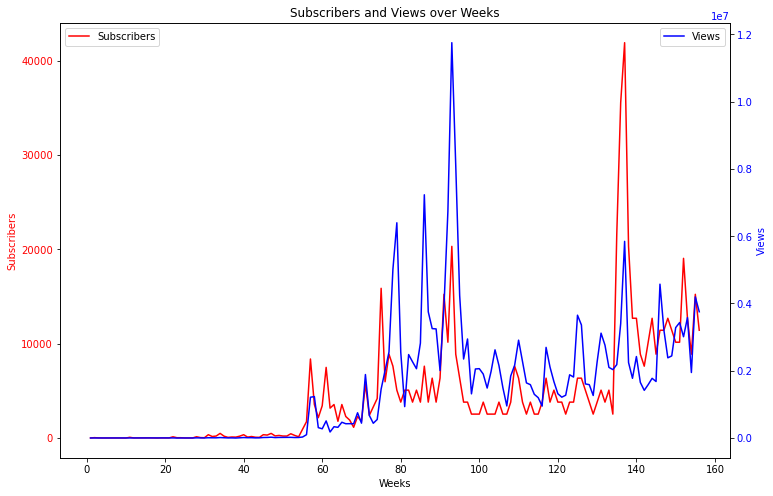

In [274]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotting 'subs' against 'week' on the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(df_stats['week'].to_numpy(), df_stats['subs'].to_numpy(), color='red', label='Subscribers')
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Subscribers', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Creating a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_stats['week'].to_numpy(), df_stats['views'].to_numpy(), color='blue', label='Views')
ax2.set_ylabel('Views', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adding title
plt.title('Subscribers and Views over Weeks')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

In [275]:
correlation = df_stats['subs'].corr(df_stats['views'])
correlation

0.6399424862571389

In [276]:
df_videos['publishedAt'] = pd.to_datetime(df_videos['publishedAt'])

In [277]:
from datetime import datetime

df_videos['day'] = df_videos['publishedAt'].dt.strftime('%d-%m-%y')
df_videos['day'] = pd.to_datetime(df_videos['day'], format='%d-%m-%y')
df_videos['day']

0      2024-08-09
1      2024-08-09
2      2024-08-08
3      2024-08-07
4      2024-08-06
          ...    
1286   2021-07-26
1287   2021-07-25
1288   2021-07-25
1289   2021-07-25
1290   2021-07-22
Name: day, Length: 1291, dtype: datetime64[ns]

In [278]:
stats_day = df_videos.groupby('day')[['likeCount', 'viewCount']].sum().reset_index()
stats_day['week_period'] = stats_day['day'].dt.to_period('W')
stats_week = stats_day.drop(columns='day').groupby('week_period').sum().reset_index()
stats_week

,week_period,likeCount,viewCount
0,2021-07-19/2021-07-25,942,47014
1,2021-07-26/2021-08-01,2377,57441
2,2021-08-09/2021-08-15,128,6899
3,2021-10-18/2021-10-24,265,9880
4,2021-11-29/2021-12-05,312,18039
...,...,...,...
118,2024-07-08/2024-07-14,4413,117563
119,2024-07-15/2024-07-21,13412,330083
120,2024-07-22/2024-07-28,334961,6892588
121,2024-07-29/2024-08-04,1846,68611


In [279]:
df_stats['week_period'] = pd.to_datetime(df_stats['start_date']).dt.to_period('W')
df_stats['week_period'][0].start_time

Timestamp('2021-08-09 00:00:00')

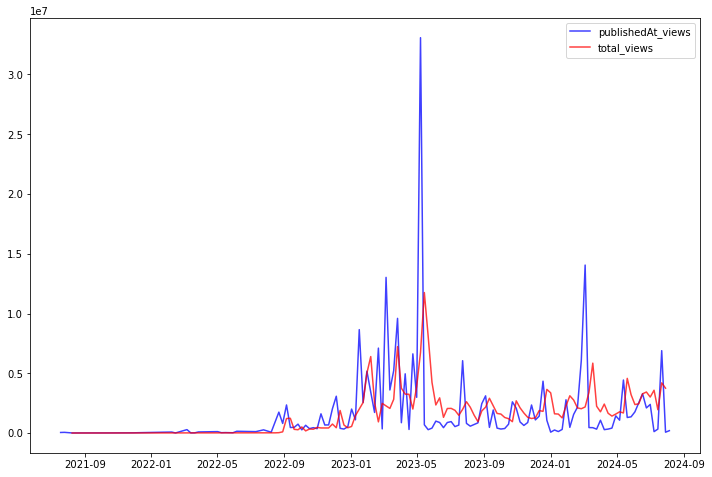

In [280]:
stats_week = stats_day.drop(columns='day').groupby('week_period').sum().reset_index()

plt.figure(figsize=(12,8))
plt.plot(stats_week['week_period'].dt.start_time.to_numpy(), stats_week['viewCount'].to_numpy(), color='blue', alpha=0.75, label='publishedAt_views')
plt.plot(df_stats['week_period'].dt.start_time.to_numpy(), df_stats['views'].to_numpy(), color='red', alpha=0.75, label='total_views')
plt.legend()
plt.show();

In [281]:
views_published_correlation = df_stats['views'].corr(stats_week['viewCount'])
corr_abs = np.abs(views_published_correlation)
corr_abs

0.0792771493727911

# Standarize Views vs Subscription comparison

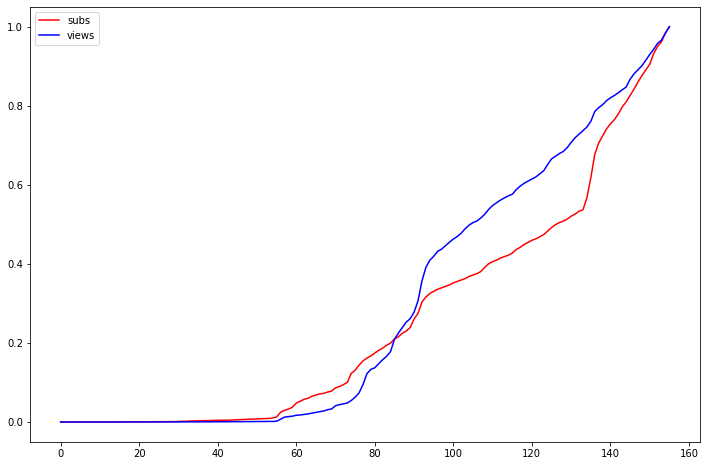

In [282]:
# Standarize Views vs Subscription comparison

plt.figure(figsize=(12,8))
(df_stats['subs'].cumsum()/df_stats['subs'].sum()).plot(color='red')
(df_stats['views'].cumsum()/df_stats['views'].sum()).plot(color='blue')
plt.legend()
plt.show();

# Views & Subscription KPIs

In [283]:
df_stats

,Unnamed: 0,subs,views,week,start_date,end_date,subs_cumsum,views_cumsum,week_period
0,0,6.0,1303.0,1,2021-08-09,2021-08-15,6.0,1303.0,2021-08-09/2021-08-15
1,1,41.0,1430.0,2,2021-08-16,2021-08-22,47.0,2733.0,2021-08-16/2021-08-22
2,2,17.0,1263.0,3,2021-08-23,2021-08-29,64.0,3996.0,2021-08-23/2021-08-29
3,3,5.0,1228.0,4,2021-08-30,2021-09-05,69.0,5224.0,2021-08-30/2021-09-05
4,4,8.0,1154.0,5,2021-09-06,2021-09-12,77.0,6378.0,2021-09-06/2021-09-12
...,...,...,...,...,...,...,...,...,...
151,151,19039.0,3011792.0,152,2024-07-01,2024-07-07,658768.0,221354154.0,2024-07-01/2024-07-07
152,152,12691.0,3580492.0,153,2024-07-08,2024-07-14,671459.0,224934646.0,2024-07-08/2024-07-14
153,153,8883.0,1948125.0,154,2024-07-15,2024-07-21,680342.0,226882771.0,2024-07-15/2024-07-21
154,154,15230.0,4195802.0,155,2024-07-22,2024-07-28,695572.0,231078573.0,2024-07-22/2024-07-28


In [284]:
subs_kpi = []
for n in range(0, len(df_stats['subs_cumsum'])):
    if n == 0:
        subs_kpi.append(0)
    else:
        subs_kpi.append(((df_stats['subs_cumsum'][n] / (df_stats['subs_cumsum'][n - 1]) - 1) * 100).round(2))

df_stats['subs_kpi'] = pd.Series(subs_kpi)

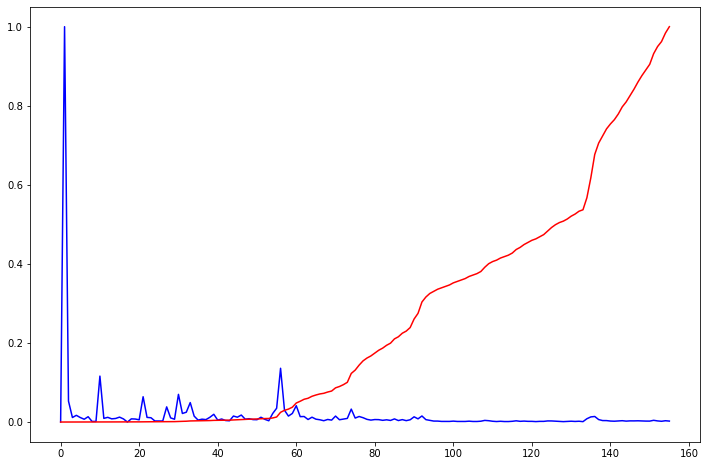

In [296]:
import seaborn as sns

plt.figure(figsize=(12,8))
plt.plot(df_stats['subs_kpi'] / df_stats['subs_kpi'].max(), color='blue')
plt.plot(df_stats['subs_cumsum'] / df_stats['subs_cumsum'].max(), color='red')

In [297]:
df_comments.head()

,comment_id,kind,author,author_channel_id,text,like_count,published_at,updated_at,canRate,viewerRating,canReply,totalReplyCount,isPublic,video_id
0,Ugyq5nIaU-1IHd9XPjB4AaABAg,youtube#commentThreadListResponse,@LuzGonzalez-gw9ic,UCTkF0ZVLtlFnc9_jcsuHvIQ,Es miooo. Si lo tiras del 4 piso yo lo recibo 🎉,0,2024-08-10T09:15:38Z,2024-08-10T09:15:38Z,True,none,True,0.0,True,3BbSreQ8_Dg
1,Ugwpfh3GbB75IYPvI-B4AaABAg,youtube#commentThreadListResponse,@Batman14388,UCb3d6Ru1exBTzlN-Zx99m3A,k pasa,0,2024-08-10T07:35:21Z,2024-08-10T07:35:21Z,True,none,True,0.0,True,3BbSreQ8_Dg
2,UgynWFA9OQjvhAPF7yl4AaABAg,youtube#commentThreadListResponse,@ErManolitothreethousand,UC8IRx0FzSKVx86bW9M91LAA,Me uno al sorteo!!!!,0,2024-08-10T00:58:20Z,2024-08-10T00:58:20Z,True,none,True,0.0,True,3BbSreQ8_Dg
3,Ugw5mffBN8GcQgQtJsJ4AaABAg,youtube#commentThreadListResponse,@toninavarro3868,UCaLMhDkp6v6BYgQF6Mraztg,Pues aquí estamos a ver si toca!!,0,2024-08-10T00:04:31Z,2024-08-10T00:04:31Z,True,none,True,0.0,True,3BbSreQ8_Dg
4,UgzKmMFaHwpG6HYFb8V4AaABAg,youtube#commentThreadListResponse,@Jara-,UCQydswFeBxeGNpVDnDYINfg,Holaa,0,2024-08-09T23:23:34Z,2024-08-09T23:23:34Z,True,none,True,0.0,True,3BbSreQ8_Dg


In [286]:
df_stats['subs_cumsum'].head()

0     6.0
1    47.0
2    64.0
3    69.0
4    77.0
Name: subs_cumsum, dtype: float64